In [1]:
matchId= '12007508'

In [2]:
import requests

params = {
    'matchId': matchId,
}

response = requests.get('https://www.sofascore.com/api/v1/event/'+ matchId +'/shotmap', params)

In [3]:
data = response.json()

In [4]:
shots_data = []
for shot in data['shotmap']:
    shot_info = {
        'name': shot['player']['name'],
        'isHome': shot['isHome'],
        'shotType': shot['shotType'],
        'x': shot['draw']['start']['x'],
        'y': shot['draw']['start']['y']
    }
    shots_data.append(shot_info)

In [5]:
# Separate data into home and away shots
home_shots = [shot for shot in shots_data if shot['isHome']]
away_shots = [shot for shot in shots_data if not shot['isHome']]

In [6]:
import pandas as pd

In [7]:
shotmapHome = pd.DataFrame(home_shots)
shotmapAway = pd.DataFrame(away_shots)

In [8]:
shotmapHome.head()

,name,isHome,shotType,x,y
0,Nandhakumar Sekar,True,block,24.9,19.8
1,Vishnu PV,True,miss,58.7,24.6
2,Cleiton Silva,True,save,23.0,22.1
3,Vishnu PV,True,miss,59.4,10.3
4,Cleiton Silva,True,miss,50.1,24.7


In [9]:
shotmapAway.head()

,name,isHome,shotType,x,y
0,Dimitri Petratos,False,block,64.0,14.4
1,Anirudh Thapa,False,block,57.2,29.0
2,Liston Colaco,False,miss,32.3,8.6
3,Sahal Abdul Samad,False,miss,32.5,13.0
4,Jason Cummings,False,save,50.7,15.1


In [10]:
shotmapHome.x= 100- shotmapHome.x
shotmapHome.y= 100- shotmapHome.y
shotmapAway.x= 100- shotmapAway.x
shotmapAway.y= 100- shotmapAway.y

In [11]:
hteam_df_g = shotmapHome[shotmapHome["shotType"] == "goal"]
hteam_df_ng = shotmapHome[shotmapHome["shotType"] != "goal"]

ateam_df_g = shotmapAway[shotmapAway["shotType"] == "goal"]
ateam_df_ng = shotmapAway[shotmapAway["shotType"] != "goal"]

In [12]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch

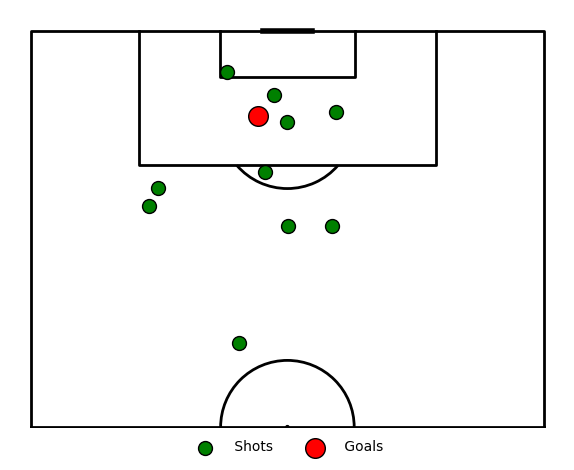

In [13]:
pitch = VerticalPitch(pitch_type='opta',half=True, pitch_color='white', line_color='black',pad_bottom=0.15)
fig, ax = pitch.draw()
# hteam non goals shots:
hteam_sc_ng = pitch.scatter(hteam_df_ng["y"], hteam_df_ng["x"],s = 100,
                         marker="o", c= 'Green', ax=ax, edgecolors='Black',linewidth = 1, label = " Shots")
# hteam goals:
hteam_sc_g = pitch.scatter(hteam_df_g["y"], hteam_df_g["x"], s = 200,
                         marker="o",c= 'Red', ax=ax,  edgecolors='Black',linewidth = 1, label = " Goals")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), frameon= False, ncol=2)
plt.savefig('Home Shotmap.png',  bbox_inches='tight')
plt.show()

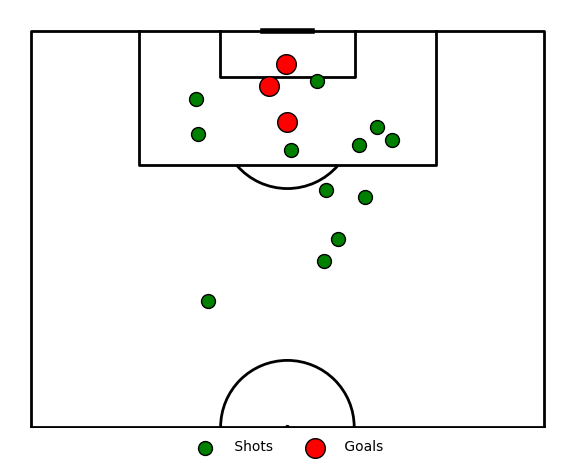

In [14]:
pitch = VerticalPitch(pitch_type='opta',half=True, pitch_color='white', line_color='black',pad_bottom=0.15)
fig, ax = pitch.draw()
# hteam non goals shots:
ateam_sc_ng = pitch.scatter(ateam_df_ng["y"], ateam_df_ng["x"],s = 100,
                         marker="o", c= 'green', ax=ax, edgecolors='Black',linewidth = 1, label = " Shots")

# hteam goals:
ateam_sc_g = pitch.scatter(ateam_df_g["y"], ateam_df_g["x"], s = 200,
                         marker="o",c= 'red', ax=ax, edgecolors='black',linewidth = 1, label = " Goals")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0), frameon= False, ncol=2)

plt.savefig('Away Shotmap.png', bbox_inches='tight')
plt.show()